### 목표
- 한 번 실습했던 패션데이터를 가지고 활성화함수, 최적화함수를 변화시켜가면서 결과를 확인해보자!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist

In [2]:
data = fashion_mnist.load_data()
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(X_train, y_train), (X_test, y_test) = data

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


- 정답 데이터를 원핫인코딩

In [5]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [6]:
y_train_one_hot

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,1,0,0,0,0
59996,0,1,0,0,0,0,0,0,0,0
59997,0,0,0,1,0,0,0,0,0,0
59998,1,0,0,0,0,0,0,0,0,0


### 활성화 함수, 최적화 함수 별 비교해서 신경망을 구성해보자!
- 1.중간층 활성화 함수 : sigmoid, 최적화 함수 : SGD
- 2.중간층 활성화 함수 : relu, 최적화 함수 : SGD
- 3.중간층 활성화 함수 : relu, 최적화 함수 : Adam
   - model1, 2, 3 나눠서 신경망 구성하고 각각 학습, 시각화까지 진행해보세요!

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [8]:
# 1.sigmoid + SGD
model1 = Sequential()

model1.add(Flatten(input_shape=(28,28)))

model1.add(Dense(200, activation='sigmoid'))
model1.add(Dense(100, activation='sigmoid'))
model1.add(Dense(50, activation='sigmoid'))

model1.add(Dense(10, activation='softmax'))

In [9]:
model1.compile(loss='categorical_crossentropy',
               optimizer='SGD',
               metrics=['acc']
              )

In [10]:
h1 = model1.fit(X_train, y_train_one_hot,
                validation_split = 0.3,
                epochs=50,
                batch_size=256
               )

Epoch 1/50
165/165 [==============================] - 1s 4ms/step - loss: 2.2958 - acc: 0.2165 - val_loss: 2.2424 - val_acc: 0.4070
Epoch 2/50
165/165 [==============================] - 1s 3ms/step - loss: 2.2182 - acc: 0.4741 - val_loss: 2.1925 - val_acc: 0.4999
Epoch 3/50
165/165 [==============================] - 1s 3ms/step - loss: 2.1679 - acc: 0.5283 - val_loss: 2.1405 - val_acc: 0.5644
Epoch 4/50
165/165 [==============================] - 1s 3ms/step - loss: 2.1123 - acc: 0.5516 - val_loss: 2.0789 - val_acc: 0.5271
Epoch 5/50
165/165 [==============================] - 0s 3ms/step - loss: 2.0456 - acc: 0.5324 - val_loss: 2.0060 - val_acc: 0.5407
Epoch 6/50
165/165 [==============================] - 1s 3ms/step - loss: 1.9672 - acc: 0.5401 - val_loss: 1.9218 - val_acc: 0.5352
Epoch 7/50
165/165 [==============================] - 1s 3ms/step - loss: 1.8789 - acc: 0.5324 - val_loss: 1.8298 - val_acc: 0.5514
Epoch 8/50
165/165 [==============================] - 1s 4ms/step - loss: 1.

In [11]:
# 2.relu + SGD
model2 = Sequential()

model2.add(Flatten(input_shape=(28,28)))

model2.add(Dense(200, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(50, activation='relu'))

model2.add(Dense(10, activation='softmax'))

In [12]:
model2.compile(loss='categorical_crossentropy',
               optimizer=SGD(lr=0.001),   # SGD의 학습률(lr) 디폴트값은 0.01
               metrics=['acc']
              )

In [13]:
h2 = model2.fit(X_train, y_train_one_hot,
                validation_split = 0.3,
                epochs=50,
                batch_size=256
               )

Epoch 1/50
165/165 [==============================] - 1s 7ms/step - loss: 9.3499 - acc: 0.5348 - val_loss: 1.1414 - val_acc: 0.6486
Epoch 2/50
165/165 [==============================] - 1s 3ms/step - loss: 0.9173 - acc: 0.6948 - val_loss: 0.8481 - val_acc: 0.7146
Epoch 3/50
165/165 [==============================] - 1s 3ms/step - loss: 0.7821 - acc: 0.7368 - val_loss: 0.7707 - val_acc: 0.7432
Epoch 4/50
165/165 [==============================] - 1s 3ms/step - loss: 0.7064 - acc: 0.7608 - val_loss: 0.7225 - val_acc: 0.7565
Epoch 5/50
165/165 [==============================] - 0s 3ms/step - loss: 0.6607 - acc: 0.7730 - val_loss: 0.7070 - val_acc: 0.7565
Epoch 6/50
165/165 [==============================] - 0s 3ms/step - loss: 0.6274 - acc: 0.7832 - val_loss: 0.6833 - val_acc: 0.7598
Epoch 7/50
165/165 [==============================] - 1s 3ms/step - loss: 0.6015 - acc: 0.7911 - val_loss: 0.6480 - val_acc: 0.7719
Epoch 8/50
165/165 [==============================] - 1s 3ms/step - loss: 0.

In [14]:
# 3.relu + Adam

In [15]:
model3 = Sequential()

model3.add(Flatten(input_shape=(28,28)))

model3.add(Dense(200, activation='relu'))
model3.add(Dense(100, activation='relu'))
model3.add(Dense(50, activation='relu'))

model3.add(Dense(10, activation='softmax'))

In [16]:
model3.compile(loss='categorical_crossentropy',
               optimizer='Adam',
               metrics=['acc']
              )

In [17]:
h3 = model3.fit(X_train, y_train_one_hot,
                validation_split = 0.3,
                epochs=50,
                batch_size=256
               )

Epoch 1/50
165/165 [==============================] - 1s 4ms/step - loss: 5.7580 - acc: 0.7056 - val_loss: 1.8024 - val_acc: 0.7393
Epoch 2/50
165/165 [==============================] - 1s 4ms/step - loss: 1.1946 - acc: 0.7869 - val_loss: 0.9341 - val_acc: 0.8009
Epoch 3/50
165/165 [==============================] - 1s 3ms/step - loss: 0.7986 - acc: 0.8083 - val_loss: 0.8014 - val_acc: 0.7994
Epoch 4/50
165/165 [==============================] - 1s 3ms/step - loss: 0.6368 - acc: 0.8245 - val_loss: 0.6481 - val_acc: 0.8134
Epoch 5/50
165/165 [==============================] - 1s 4ms/step - loss: 0.5104 - acc: 0.8406 - val_loss: 0.6533 - val_acc: 0.8136
Epoch 6/50
165/165 [==============================] - 1s 3ms/step - loss: 0.4647 - acc: 0.8485 - val_loss: 0.5535 - val_acc: 0.8383
Epoch 7/50
165/165 [==============================] - 1s 3ms/step - loss: 0.4152 - acc: 0.8578 - val_loss: 0.5165 - val_acc: 0.8362
Epoch 8/50
165/165 [==============================] - 1s 3ms/step - loss: 0.

- 3종류 모델 시각화

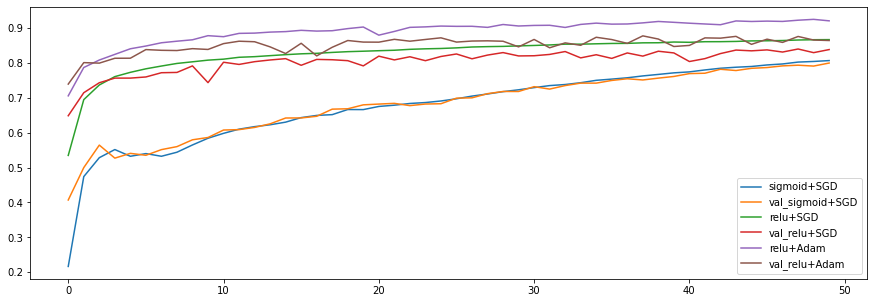

In [18]:
plt.figure(figsize=(15,5))

# model1
plt.plot(h1.history['acc'], label='sigmoid+SGD')
plt.plot(h1.history['val_acc'], label='val_sigmoid+SGD')

# model2
plt.plot(h2.history['acc'], label='relu+SGD')
plt.plot(h2.history['val_acc'], label='val_relu+SGD')

# model3
plt.plot(h3.history['acc'], label='relu+Adam')
plt.plot(h3.history['val_acc'], label='val_relu+Adam')

plt.legend()
plt.show()

### 최적화 모델 찾기
- 모델체크포인트 : 모델을 저장
- 얼리스탑핑 : 조기 학습 중단(과대적합, 시간낭비를 방지)

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [20]:
# 1.모델저장
# 저장 경로 및 파일명 형태 설정
save_path = 'model/FashionModel_{epoch:03d}_{val_acc:.4f}.hdf5'
# d : 10진수 형태, 03 -> 0이 3개 붙어있는 형태의 자리수(001, 002, 003 ...)
# f : 소수점 형태, .4 -> 소수점 4자리 까지 형태의 자리수(0.001, 0.002 ...)
# hdf5 : 저장되는 파일의 확장자명

f_mckp = ModelCheckpoint(filepath = save_path,  # 파일 경로 설정
                         monitor = 'val_acc',   # 기준이 될 값을 설정
                         # 모니터값이 최고점 혹은 최저점을 갱신했을 때 모델 저장
                         save_best_only = True, 
                         # save_best_only가 True일때 모니터링 하는 값의 최대,최소를 결정
                         mode = 'max',
                         verbose = 1            # 모델 개선 및 저장 메시지 출력
                        )

In [21]:
# 2.조기 학습 중단
f_early = EarlyStopping(monitor = 'val_acc',
                        # monitor값의 개선을 몇번이나 기다려줄지 설정
                        patience = 5
                       )

# → 모델 학습시 val_acc가 5번의 epochs를 돌 동안 개선이 되지 않으면
#    학습을 중단시켜주세요~!

In [22]:
model4 = Sequential()

model4.add(Flatten(input_shape=(28,28)))

model4.add(Dense(200, activation='relu'))
model4.add(Dense(100, activation='relu'))
model4.add(Dense(50, activation='relu'))

model4.add(Dense(10, activation='softmax'))

In [23]:
model4.compile(loss='categorical_crossentropy',
               optimizer='Adam',
               metrics=['acc']
              )

In [24]:
h4 = model4.fit(X_train, y_train_one_hot,
                validation_split = 0.3,
                epochs=50,
                batch_size=256,
                callbacks=[f_mckp, f_early]  # 모델체크포인트, 얼리스탑핑 적용
               )

Epoch 1/50
147/165 [=========================>....] - ETA: 0s - loss: 4.5872 - acc: 0.7018
Epoch 00001: val_acc improved from -inf to 0.78200, saving model to model\FashionModel_001_0.7820.hdf5
165/165 [==============================] - 1s 5ms/step - loss: 4.2453 - acc: 0.7082 - val_loss: 1.2372 - val_acc: 0.7820
Epoch 2/50
154/165 [===========================>..] - ETA: 0s - loss: 0.9037 - acc: 0.7931
Epoch 00002: val_acc did not improve from 0.78200
165/165 [==============================] - 1s 3ms/step - loss: 0.9008 - acc: 0.7928 - val_loss: 0.8674 - val_acc: 0.7690
Epoch 3/50
155/165 [===========================>..] - ETA: 0s - loss: 0.6496 - acc: 0.8170
Epoch 00003: val_acc improved from 0.78200 to 0.80494, saving model to model\FashionModel_003_0.8049.hdf5
165/165 [==============================] - 1s 3ms/step - loss: 0.6500 - acc: 0.8164 - val_loss: 0.6834 - val_acc: 0.8049
Epoch 4/50
157/165 [===========================>..] - ETA: 0s - loss: 0.5442 - acc: 0.8308
Epoch 00004: v

#### 저장된 모델 불러오기

In [25]:
from tensorflow.keras.models import load_model

In [27]:
best_model = load_model('model/FashionModel_010_0.8563.hdf5')

In [28]:
best_model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 0s 446us/step - loss: 0.4999 - acc: 0.8459


[0.4998713433742523, 0.8458999991416931]